# Generate Corr of Alts vs Index

In [1]:
import sys
sys.path.insert(0, '../')

from lmda.plotting import vertical_corr_plot,matrix_corr_plot
from lmda.DataDownloader.download_data_current import download_new_data
import matplotlib.pyplot as plt
import pandas as pd
import math
import decimal
import seaborn as sns
import requests
from scipy import stats
import numpy as np
import re
import logging
import string
from datetime import datetime
import dateutil.parser
from functools import reduce
from sklearn.preprocessing import StandardScaler

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.options.mode.chained_assignment = None 

from functools import reduce
from jupyterthemes import jtplot
jtplot.style()

pd.options.display.max_columns = 50  # None -> No Restrictions
pd.options.display.max_rows = 100    # None -> Be careful with this 
pd.options.display.max_colwidth = 400
%matplotlib inline

In [8]:
#Download hourly prices for top 14 assets
path = '../csv/USD_hourly_CCCAGG_Top15_from_2018.csv'
price_raw = download_new_data(path=path,quote='USD',
tickers=['BTC','ETH', 'XRP', 'LTC','BCH', 'XMR', 'ETC','LINK','ADA','EOS','XLM',
                'NEO','DOT','DASH','ATOM'],
exchange='CCCAGG',
download_data=True)

# load in Alts spot data
path = '../csv/USD_hourly_CCCAGG_Top15_from_2018.csv'
df = pd.read_csv(path, header=0, index_col='Time', parse_dates=True)
df.drop(columns=['EOS','BCH','XRP'],inplace=True)
df1 = df.resample('1H').first()

# generate % chgs for alts df
df_pct = df1.pct_change()
df_pct.replace(np.nan,0,inplace=True)

# generate Benchmark % chg
df_pct['Benchmark_%'] = ((df_pct['ETH'] * (1/10)) + (df_pct['XLM'] * (1/10)) + \
                           (df_pct['LTC'] * (1/10)) + (df_pct['ETC'] * (1/10)) + \
                           (df_pct['DASH'] * (1/10)) + (df_pct['NEO'] * (1/10)) + \
                           (df_pct['LINK'] * (1/10)) + (df_pct['XMR'] * (1/10)) + \
                           (df_pct['ATOM'] * (1/10)) + (df_pct['ADA'] * (1/10)))                            

targetcol = 'Benchmark_%'
df = df_pct

start1y = '2020-02-06'
end1y = '2021-02-06'

start90d = '2020-11-06'
end90d = '2021-02-06'

start30d = '2020-01-06'
end30d = '2021-02-06'

start7d = '2021-01-30'
end7d = '2021-02-06'

start3d = '2020-02-03'
end3d = '2021-02-06'


df_pct.tail(2)

,BTC,ETH,LTC,XMR,ETC,LINK,ADA,XLM,NEO,DOT,DASH,ATOM,Benchmark_%
Time,,,,,,,,,,,,,
2021-02-07 00:00:00,0.008376,0.002608,0.002954,0.006235,0.005005,0.004389,0.022054,0.020619,0.020934,0.013725,0.011175,0.005795,0.010177
2021-02-07 01:00:00,-0.001423,-0.000386,-0.000256,-0.000848,0.003056,0.000397,-0.001850,-0.006216,-0.001183,-0.000484,-0.000332,0.000823,-0.000680


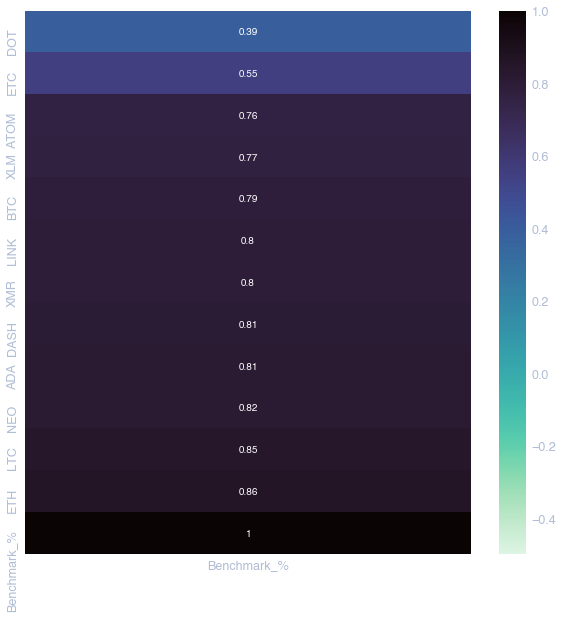

In [9]:
# 1yr view of consituents excess vs BTC
start = start1y
end = end1y
vertical_corr_plot(df,start,end,targetcol)

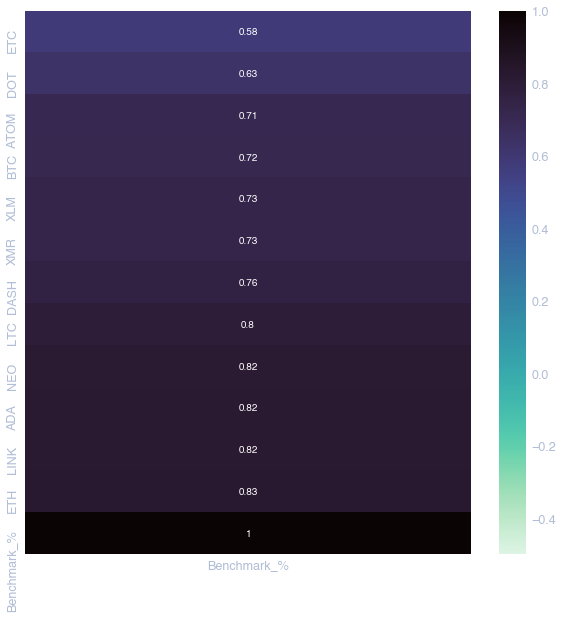

In [10]:
# 90d view of consituents excess vs BTC
start = start90d
end = end90d
vertical_corr_plot(df,start,end,targetcol)

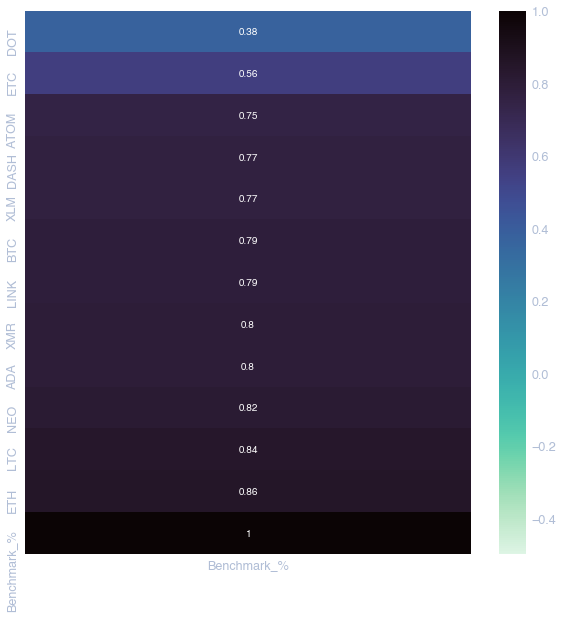

In [11]:
# 30d view of consituents excess vs BTC
start = start30d
end = end30d
vertical_corr_plot(df,start,end,targetcol)

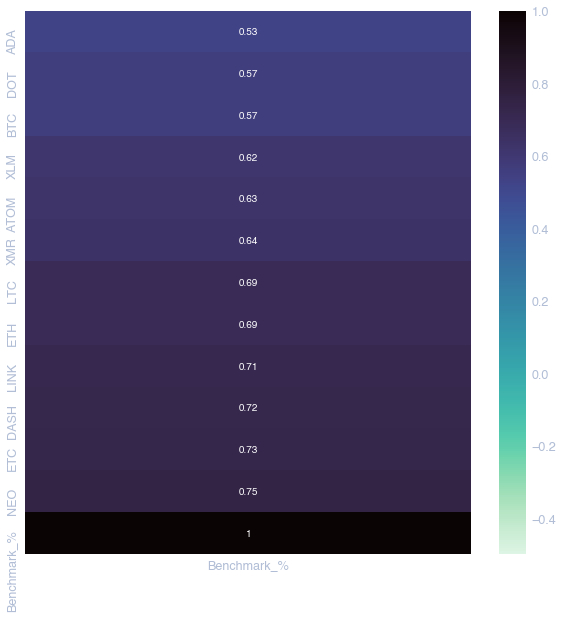

In [12]:
# 7 d view of consituents excess vs BTC
start = start7d
end = end7d
vertical_corr_plot(df,start,end,targetcol)